# Wavelet Transform Modulus Maxima (WTMM) Tutorial

#### 1. **Introduction to Systems and Signals**

Let's start by thinking about systems and the signals they generate. Imagine you have a simple system, like a drum. When you hit the drum, it produces a sound—a signal. This sound can be thought of as a wave moving through the air. Similarly, many systems in nature, like weather patterns or the stock market, produce signals that change over time.

These signals can be smooth and regular, like a steady drumbeat, or they can be more complex and irregular, like the chaotic sounds of a busy city. The complexity of these signals can tell us a lot about the system that generated them.

#### 2. **Understanding Singularities**

Now, let's think about something a bit more abstract: singularities. In the simplest terms, a singularity is a point where a function (like our signal) behaves unusually. For example, imagine you're driving along a smooth road, and suddenly there's a sharp bump. That bump is a singularity in the otherwise smooth road.

In mathematical terms, singularities are points where the derivative of a function (which tells us the rate of change of the function) becomes very large or undefined. These points are crucial because they often indicate important features of the system, like sharp transitions or edges.

#### 3. **Fractal Dimension**

Fractals are complex structures that look similar at different scales. A famous example is the coastline of a country: no matter how much you zoom in, you always see the same kind of jagged, irregular shape. The fractal dimension is a way to describe how "complex" a fractal is. Unlike regular dimensions (like 1D for a line or 2D for a plane), fractal dimensions can be non-integer, reflecting the self-similarity and complexity of the structure.

#### 4. **Wavelet Transform**

To analyze signals, we often need to look at them at different scales. For example, if you’re listening to music, you might want to focus on the high notes or the low notes separately. The wavelet transform is a mathematical tool that lets us do this. Unlike the Fourier transform, which breaks a signal down into sine and cosine waves, the wavelet transform uses short, "wave-like" functions that can be stretched or compressed to analyze different parts of a signal in detail.

#### 5. **Connecting Singularities, Fractal Dimension, and Wavelet Transform**

When analyzing a signal, we might be interested in finding the singularities—those sharp, important features. The Wavelet Transform Modulus Maxima (WTMM) method is a way to do this. By applying the wavelet transform to a signal and looking at the maxima (peaks) of the transform, we can identify where the singularities are. Moreover, the distribution of these maxima can tell us about the fractal dimension of the signal, giving us insight into the complexity of the system that generated it.

# More Detailed Explanation

#### 1. **Singularities and Derivatives**

At a more advanced level, singularities are points where the derivative of a function either becomes infinite or is not well-defined. For example, consider the function $ f(x) = |x| $. At $ x = 0 $, the derivative does not exist because the slope of the function changes abruptly. This is a simple singularity.

Singularities are important in physics, engineering, and mathematics because they often represent critical points where the behavior of a system changes drastically. For example, in a physical system, a singularity might represent a point of phase transition, like water turning into ice.

#### 2. **Fractal Dimension and Self-Similarity**

Fractal dimensions are used to describe objects that are self-similar—meaning they look the same at different scales. The fractal dimension $ D $ is not an integer; it can be thought of as describing how a fractal "fills space". For example, the coastline of Britain has a fractal dimension greater than 1 but less than 2, indicating that it is more complex than a simple line but does not completely fill a plane.

Mathematically, the fractal dimension $ D $ can be calculated using the box-counting method, where we count how many boxes of size $ \epsilon $ are needed to cover the fractal and see how this number changes as $ \epsilon $ changes.

#### 3. **Wavelet Transform Modulus Maxima (WTMM) and Signal Analysis**

The wavelet transform is an integral transform that uses a wavelet function as a kernel. The continuous wavelet transform (CWT) of a function $ f(t) $ is given by:

$
W(a, b) = \frac{1}{\sqrt{a}} \int_{-\infty}^{\infty} f(t) \psi\left(\frac{t-b}{a}\right) dt
$

where $ \psi(t) $ is the mother wavelet, $ a $ is the scale parameter (which stretches or compresses the wavelet), and $ b $ is the translation parameter (which shifts the wavelet in time).

In the WTMM method, we apply the wavelet transform to a signal and look for the modulus maxima, which are the local maxima of the wavelet transform's magnitude. These maxima indicate the locations of singularities in the signal. By analyzing the scaling behavior of these maxima, we can estimate the fractal dimension of the signal.

### Advanced Mathematical Explanation

#### 1. **Singularities and Wavelets**

Consider a signal $ f(t) $ with a singularity at $ t_0 $. Near the singularity, $ f(t) $ can be approximated by a power law:

$
f(t) \sim |t - t_0|^{\alpha}
$

where $ \alpha $ is the Hölder exponent, which characterizes the strength of the singularity. The wavelet transform at scale $ a $ near the singularity behaves as:

$
W(a, b) \sim a^{\alpha + 1/2}
$

The modulus maxima of the wavelet transform occur at the points where the derivative of $ W(a, b) $ with respect to $ b $ is zero. These points correspond to the locations of singularities.

#### 2. **Fractal Dimension from WTMM**

The fractal dimension $ D $ of a signal can be related to the scaling behavior of the wavelet transform maxima. If $ N(\epsilon) $ is the number of maxima above a threshold $ \epsilon $, then the fractal dimension is given by:

$
D = \lim_{\epsilon \to 0} \frac{\log N(\epsilon)}{\log \frac{1}{\epsilon}}
$

This approach allows us to quantify the complexity of a signal by analyzing the distribution of its singularities.

# Applications and Motivation

The WTMM method is particularly useful in analyzing complex signals that contain singularities or fractal structures. Some applications include:

- **Turbulence analysis**: WTMM can be used to study the scaling properties of turbulent flows, which often exhibit fractal-like structures.
- **Biomedical signal processing**: WTMM helps in analyzing irregular heartbeats or brain waves, where singularities may indicate important events or abnormalities.
- **Financial data analysis**: In finance, WTMM can identify sharp transitions or crashes in stock market data, which are often associated with singularities.

The motivation for using WTMM lies in its ability to provide a multi-scale analysis of signals, capturing both the local singularities and the global fractal properties.

### Implementation in Python

Below is a Python implementation of the WTMM method:

- **Signal Generation**: We create a simple signal with a singularity at $ t = 0.5 $ where the frequency changes abruptly.
- **Wavelet Transform**: We perform the continuous wavelet transform (CWT) using the Mexican hat wavelet (`mexh`) and a range of scales.
- **Modulus Maxima**: We find the modulus maxima by checking where the wavelet coefficients reach a local maximum. These points indicate potential singularities in the signal.
- **Visualization**: Finally, we plot the original signal and the wavelet transform, with the modulus maxima highlighted in red.

This implementation provides a basic framework for using the WTMM method to analyze signals, and it can be adapted for more complex applications depending on the nature of the data being analyzed.

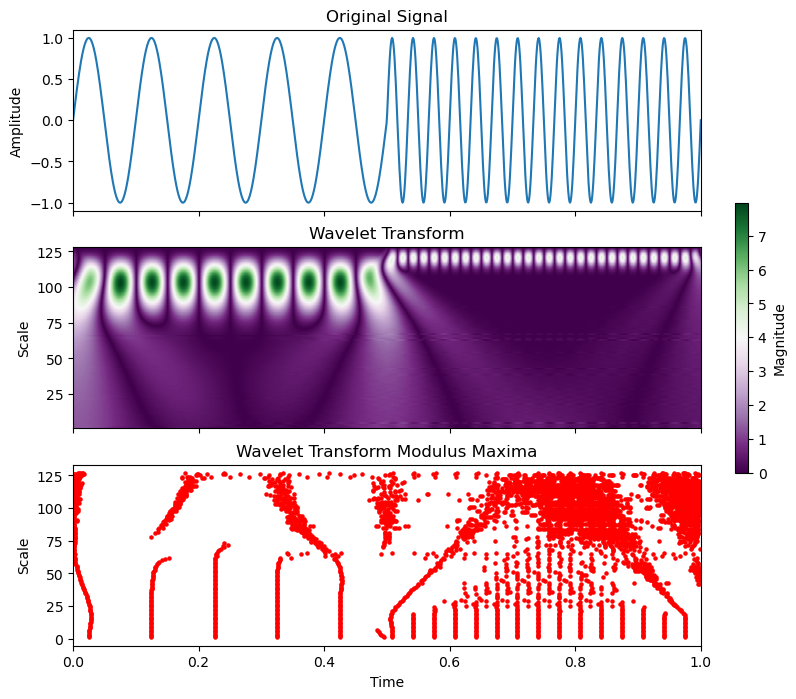

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets library for wavelet transforms

def wavelet_transform(signal, wavelet='mexh', scales=np.arange(1, 128)):
    '''
    Perform the continuous wavelet transform (CWT) on the input signal.

    Parameters:
    signal (array-like): Input signal to analyze
    wavelet (str): The mother wavelet to use ('mexh' is the Mexican hat wavelet)
    scales (array-like): Array of scales to use for the CWT

    Returns:
    coeffs (2D array): The wavelet transform coefficients
    '''
    coeffs, _ = pywt.cwt(signal, scales, wavelet)
    return coeffs

def find_modulus_maxima(coeffs):
    '''
    Identify the modulus maxima of the wavelet transform coefficients.

    Parameters:
    coeffs (2D array): The wavelet transform coefficients

    Returns:
    maxima (list of tuples): List of tuples indicating the scale and position of maxima
    '''
    maxima = []
    for scale_index, scale_coeffs in enumerate(coeffs):
        for i in range(1, len(scale_coeffs) - 1):
            if scale_coeffs[i - 1] < scale_coeffs[i] > scale_coeffs[i + 1]:
                maxima.append((scale_index, i))
    return maxima


# Generate a sample signal with a singularity:
# - The signal starts as a 10 Hz sine wave for t < 0.5, representing a relatively smooth oscillation.
# - At t = 0.5, the signal abruptly changes to a 30 Hz sine wave. This transition introduces a singularity.
# - The abrupt change in frequency creates a point of interest (singularity) where the signal's behavior changes 
#   drastically, allowing us to explore how the wavelet transform captures such features in the signal.


t = np.linspace(0, 1, 1024)
signal = np.piecewise(t, [t < 0.5, t >= 0.5], [lambda t: np.sin(2 * np.pi * 10 * t), lambda t: np.sin(2 * np.pi * 30 * t)])

# import numpy as np

# # Generate a time array from 0 to 1 with 1024 points
# t = np.linspace(0, 1, 1024)

# # Generate a sample signal with a singularity at t = 0.5
# signal = np.piecewise(t, 
#                       [t < 0.5, t >= 0.5], 
#                       [np.sin(2 * np.pi * 10 * t),   # Low-frequency sine wave (10 Hz) for the first half
#                        np.sin(2 * np.pi * 30 * t)])  # High-frequency sine wave (30 Hz) for the second half





# Perform the wavelet transform
coeffs = wavelet_transform(signal)

# Find modulus maxima
maxima = find_modulus_maxima(coeffs)

# plot everything
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot the original signal in the first subplot
ax[0].plot(t, signal)
ax[0].set_title('Original Signal')
ax[0].set_ylabel('Amplitude')

# Plot the wavelet transform using imshow in the second subplot
cax = ax[1].imshow(np.abs(coeffs), extent=[0, 1, 1, 128], cmap='PRGn', aspect='auto')
ax[1].set_title('Wavelet Transform')
ax[1].set_ylabel('Scale')

# Plot the modulus maxima using scatter in the third subplot
ax[2].scatter([m[1] / len(signal) for m in maxima], [m[0] + 1 for m in maxima], color='red', s=5)
ax[2].set_title('Wavelet Transform Modulus Maxima')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Scale')

# Adjust layout to shrink the whole figure and make space for the color bar on the right
plt.subplots_adjust(right=0.8)

# Add the color bar externally on the right
fig.colorbar(cax, ax=ax.ravel().tolist(), label='Magnitude', orientation='vertical', fraction=0.02, pad=0.05)

plt.show()



**Figure:** This figure illustrates the analysis of a signal using the Wavelet Transform Modulus Maxima (WTMM) method.

- **Top Plot (Original Signal):** The original signal is plotted over time, showing its amplitude variation. The signal transitions from a lower frequency (10 Hz) to a higher frequency (30 Hz) at \( t = 0.5 \). This abrupt change in frequency creates a singularity at the point of transition, which can be visually identified by the sudden increase in the oscillation frequency.

- **Middle Plot (Wavelet Transform):** The wavelet transform of the signal is visualized across different scales. The color intensity indicates the magnitude of the transform, with higher magnitudes highlighted in green. This plot reveals how the signal's frequency components change over time. The singularity at \( t = 0.5 \) is represented by a distinct change in the pattern of the wavelet coefficients, observable across various scales.

- **Bottom Plot (Wavelet Transform Modulus Maxima, or "Skeleton"):** The modulus maxima of the wavelet transform are plotted in red, highlighting the locations of singularities in the signal. The singularity at \( t = 0.5 \) is clearly visible in this plot as a concentration of red dots across scales at the transition point. This plot, often referred to as the "skeleton," provides a direct visualization of the signal's singularities, capturing the critical points where the signal's behavior changes abruptly.

The color bar on the right represents the magnitude of the wavelet transform, with higher values indicating stronger signal features at specific scales and times. The bottom plot is particularly valuable for pinpointing singularities in the signal, as it directly shows where these abrupt changes occur.

# Another example, the Weierstrass function

This a classic example of a continuous function that is nowhere differentiable. This function exhibits fractal properties because it has self-similar structure at different scales.

Here's how you can implement the Weierstrass function, perform the wavelet transform, and plot the results in the same manner as your previous example:

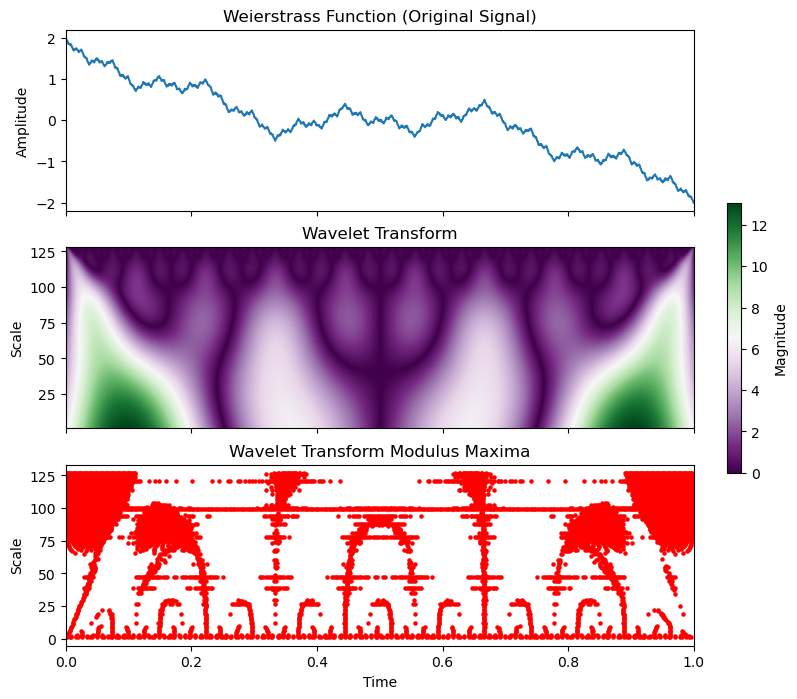

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets library for wavelet transforms

def wavelet_transform(signal, wavelet='mexh', scales=np.arange(1, 128)):
    '''
    Perform the continuous wavelet transform (CWT) on the input signal.

    Parameters:
    signal (array-like): Input signal to analyze
    wavelet (str): The mother wavelet to use ('mexh' is the Mexican hat wavelet)
    scales (array-like): Array of scales to use for the CWT

    Returns:
    coeffs (2D array): The wavelet transform coefficients
    '''
    coeffs, _ = pywt.cwt(signal, scales, wavelet)
    return coeffs

def find_modulus_maxima(coeffs):
    '''
    Identify the modulus maxima of the wavelet transform coefficients.

    Parameters:
    coeffs (2D array): The wavelet transform coefficients

    Returns:
    maxima (list of tuples): List of tuples indicating the scale and position of maxima
    '''
    maxima = []
    for scale_index, scale_coeffs in enumerate(coeffs):
        for i in range(1, len(scale_coeffs) - 1):
            if scale_coeffs[i - 1] < scale_coeffs[i] > scale_coeffs[i + 1]:
                maxima.append((scale_index, i))
    return maxima

def weierstrass_function(t, a=0.5, b=3, n_terms=100):
    '''
    Generate a Weierstrass function, which is a continuous, nowhere-differentiable function.
    
    Parameters:
    t (array-like): Time array.
    a (float): Scale factor, where 0 < a < 1.
    b (float): Frequency factor, where b is a positive integer.
    n_terms (int): Number of terms in the series.
    
    Returns:
    signal (array-like): The Weierstrass function evaluated at each point in t.
    '''
    signal = np.zeros_like(t)
    for n in range(n_terms):
        signal += a**n * np.cos(b**n * np.pi * t)
    return signal

# Generate the Weierstrass function
t = np.linspace(0, 1, 1024)
signal = weierstrass_function(t)

# Perform the wavelet transform
coeffs = wavelet_transform(signal)

# Find modulus maxima
maxima = find_modulus_maxima(coeffs)

# Plot everything
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot the original signal in the first subplot
ax[0].plot(t, signal)
ax[0].set_title('Weierstrass Function (Original Signal)')
ax[0].set_ylabel('Amplitude')

# Plot the wavelet transform using imshow in the second subplot
cax = ax[1].imshow(np.abs(coeffs), extent=[0, 1, 1, 128], cmap='PRGn', aspect='auto')
ax[1].set_title('Wavelet Transform')
ax[1].set_ylabel('Scale')

# Plot the modulus maxima using scatter in the third subplot
ax[2].scatter([m[1] / len(signal) for m in maxima], [m[0] + 1 for m in maxima], color='red', s=5)
ax[2].set_title('Wavelet Transform Modulus Maxima')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Scale')

# Adjust layout to shrink the whole figure and make space for the color bar on the right
plt.subplots_adjust(right=0.8)

# Add the color bar externally on the right
fig.colorbar(cax, ax=ax.ravel().tolist(), label='Magnitude', orientation='vertical', fraction=0.02, pad=0.05)

plt.show()

### Explanation:

1. **Weierstrass Function:**
   - The Weierstrass function is a classic example of a fractal function. It is continuous everywhere but differentiable nowhere. This function is created by summing cosine waves of increasing frequency and decreasing amplitude.
   - The parameters \(a\) and \(b\) control the scaling and frequency of the waves, respectively, and the number of terms \(n\_terms\) determines how many waves are summed.

2. **Wavelet Transform and Modulus Maxima:**
   - The wavelet transform is applied to the Weierstrass function to analyze its frequency content across scales.
   - The modulus maxima plot (often referred to as the "skeleton") shows where the wavelet coefficients reach local maxima, highlighting the fractal structure and singularities of the Weierstrass function.

3. **Plotting:**
   - The first plot shows the original Weierstrass function.
   - The second plot shows the wavelet transform, revealing the self-similar structure of the function at different scales.
   - The third plot shows the modulus maxima, which directly highlights the fractal properties and singularities within the function.
